# Проект: Исследование рынка недвижимости

**Оглавление**<a id='toc0_'></a>    
- 1. [Загрузка и первичный анализ данных](#toc1_)    
  - 1.1. [Вывод по разделу 1](#toc1_1_)    
- 2. [Предобработка данных](#toc2_)    
  - 2.1. [Изучение и заполнение пропусков, корректировка аномальных значений](#toc2_1_)    
  - 2.2. [Анализ типов данных](#toc2_2_)    
  - 2.3. [Поиск дубликатов](#toc2_3_)    
  - 2.4. [Исследование аномальных значений](#toc2_4_)    
  - 2.5. [Добавление новых столбцов](#toc2_5_)    
  - 2.6. [Вывод по разделу 2](#toc2_6_)    
- 3. [Исследовательский анализ данных и ответы на вопросы](#toc3_)    
  - 3.1. [Изучение параметров объектов (квартир)](#toc3_1_)    
  - 3.2. [Анализ сроков продажи квартир](#toc3_2_)    
  - 3.3. [Исследование влияния различных факторов на стоимость объектов](#toc3_3_)    
  - 3.4. [Исследование средней стоимости квадратного метра в населенных пунктах](#toc3_4_)    
  - 3.5. [Исследование влияния на стоимость расстояния от центра города](#toc3_5_)    
  - 3.6. [Вывод по разделу 3](#toc3_6_)    
- 4. [Общий вывод](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Задание:**

В ходе исследования необходимо определить рыночную стоимость объектов недвижимости, установить параметры, определить закономерности и взаимосвязи, ответить на ряд исследовательских вопросов. В дальнейшем это позволит построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности. 

Входные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет (данные сервиса Яндекс.Недвижимость). По каждой квартире доступны два вида данных: указанные пользователем и полученные автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

План работы:
1. Загрузка и первичный анализ данных.
2. Предобработка данных.
3. Исследовательский анализ и ответы на вопросы.
4. Общий вывод.

## 1. <a id='toc1_'></a>[Загрузка и первичный анализ данных](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter, FixedLocator
from IPython.display import display

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
# функция расчета и вывода среднего, медианы и моды для передаваемых в функцию столбцов датасета data
def mmm(spisok):
    tablica = pd.DataFrame(index=spisok, columns=['mean', 'median', 'mode'])
    for area in spisok:
        tablica.loc[area, 'mean'] = round(data[area].mean(), 0)
        tablica.loc[area, 'median'] = round(data[area].median(), 0)
        tablica.loc[area, 'mode'] = round(data[area].mode().loc[0], 0)
    display(tablica)
    return

# функция расчета и вывода среднего, медианы и моды для передаваемых в функцию названия датасета и столбцов датасета
def mmm2(dafr, spisok):
    tablica = pd.DataFrame(index=spisok, columns=['mean', 'median', 'mode'])
    for area in spisok:
        tablica.loc[area, 'mean'] = round(dafr[area].mean(), 0)
        tablica.loc[area, 'median'] = round(dafr[area].median(), 0)
        tablica.loc[area, 'mode'] = round(dafr[area].mode().loc[0], 0)
    display(tablica)
    return

In [4]:
# загрузка данных
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# загрузка описания полей данных
ind = ['airports_nearest', 'balcony', 'ceiling_height', 'cityCenters_nearest', 'days_exposition', 'first_day_exposition',
       'floor', 'floors_total', 'is_apartment', 'kitchen_area', 'last_price', 'living_area', 'locality_name', 'open_plan',
       'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'rooms', 'studio', 'total_area',
       'total_images']
polya = ['расстояние до ближайшего аэропорта в метрах (м)', 'число балконов', 'высота потолков (м)',
         'расстояние до центра города (м)', 'сколько дней было размещено объявление (от публикации до снятия)',
         'дата публикации', 'этаж', 'всего этажей в доме', 'апартаменты (булев тип)', 'площадь кухни в квадратных метрах (м2)',
         'цена на момент снятия с публикации', 'жилая площадь в квадратных метрах (м2)', 'название населённого пункта',
         'свободная планировка (булев тип)', 'число парков в радиусе 3 км', 'расстояние до ближайшего парка (м)',
         'число водоёмов в радиусе 3 км', 'расстояние до ближайшего водоёма (м)', 'число комнат',
         'квартира-студия (булев тип)', 'общая площадь квартиры в квадратных метрах (м2)',
         'число фотографий квартиры в объявлении']
opisanie = pd.DataFrame(data=polya, index=ind, columns=['opisanie'])

In [5]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [6]:
# описание полей датасета
#print(opisanie.to_string(header=False))

In [7]:
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


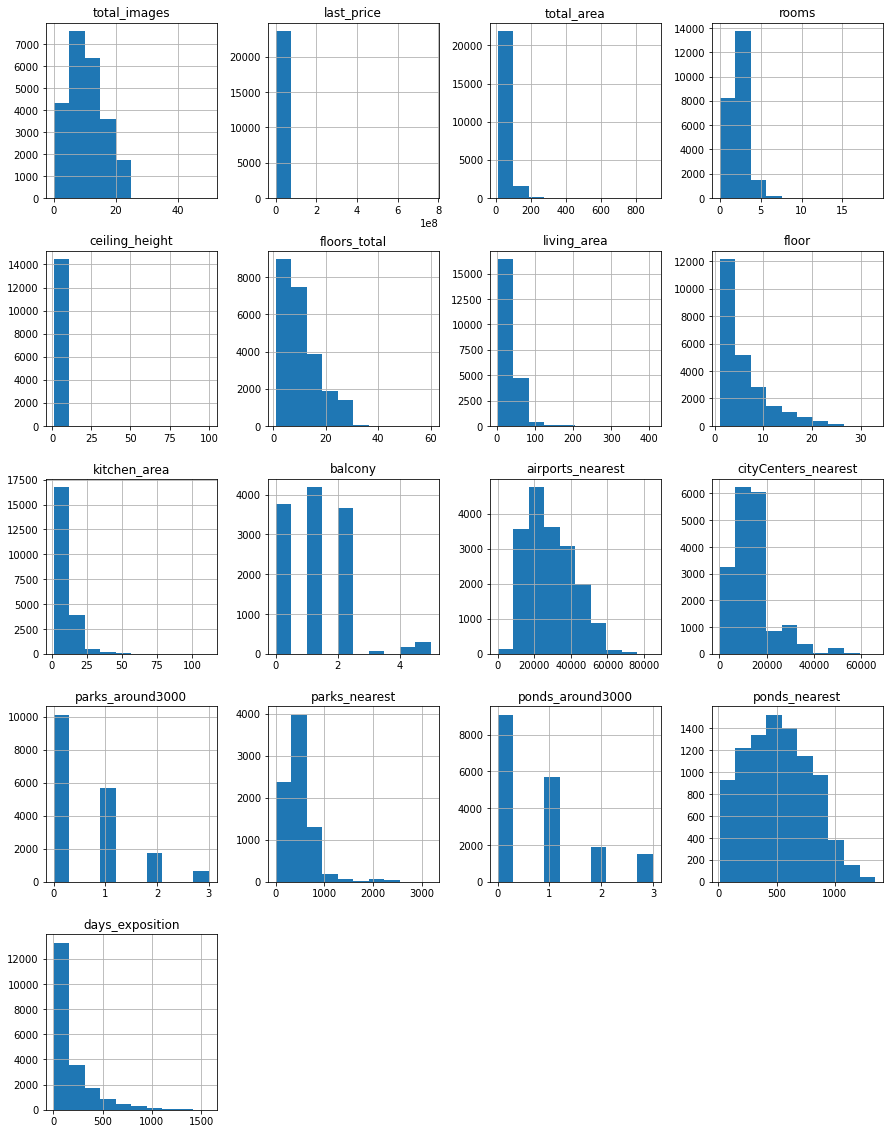

In [8]:
data.hist(figsize=(15, 20))
plt.show()

### 1.1. <a id='toc1_1_'></a>[Вывод по разделу 1](#toc0_)
Данные успешно загружены. Объем выборки составляет более 23 тысяч строк, этого достаточно для объективного исследования. Есть пропуски в данных, некорректные значения. Требуется дополнительный анализ с последующим дозаполнением, корректировкой и/или удалением некорректных данных.

## 2. <a id='toc2_'></a>[Предобработка данных](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Изучение и заполнение пропусков, корректировка аномальных значений](#toc0_)


In [9]:
# выведем столбцы с пропусками
display(data.isna().sum().sort_values(ascending=False).to_frame(name='propuscheno').query('propuscheno > 0').join(opisanie))
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,propuscheno,opisanie
is_apartment,20924,апартаменты (булев тип)
parks_nearest,15620,расстояние до ближайшего парка (м)
ponds_nearest,14589,расстояние до ближайшего водоёма (м)
balcony,11519,число балконов
ceiling_height,9195,высота потолков (м)
airports_nearest,5542,расстояние до ближайшего аэропорта в метрах (м)
cityCenters_nearest,5519,расстояние до центра города (м)
ponds_around3000,5518,число водоёмов в радиусе 3 км
parks_around3000,5518,число парков в радиусе 3 км
days_exposition,3181,сколько дней было размещено объявление (от пуб...


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [10]:
# исследуем признак аппартаментов
print(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


В столбце `is_apartment` (аппартаменты) наибольшее количество незаполненных строк. В заполненных в подавляющем большинстве случаев указано "нет", в редких случаях "да". Предположительно, заполняющие поле клиенты, или не считали важным заполнение данного поля, или не понимали в каком случае его необходимо заполнять, т.к. формально любая квартира (кроме отдельных комнат) является аппартаментами. Для нашего исследования данное поле не актуально, оставим пропуски незаполненными.

In [11]:
# исследуем четыре столбца с расстояниями
print(data['parks_nearest'].value_counts().sort_index(), '\n-----------------------------------------')
print(data['ponds_nearest'].value_counts().sort_index(), '\n----------------------------------------')
print(data['airports_nearest'].value_counts().sort_index(), '\n----------------------------------------')
print(data['cityCenters_nearest'].value_counts().sort_index(), '\n----------------------------------------')
print('Убрали нулевые значения в расстояниях до аэропорта:')
data['airports_nearest'].replace(to_replace=0, value=np.NaN, inplace=True)
print(data['airports_nearest'].value_counts().sort_index())

    1.00    1
    3.00    1
    4.00    1
    7.00    1
    9.00    2
           ..
2,905.00    1
2,984.00    1
3,013.00    1
3,064.00    1
3,190.00    2
Name: parks_nearest, Length: 995, dtype: int64 
-----------------------------------------
   13.00    2
   16.00    8
   19.00    4
   20.00    5
   22.00    7
           ..
1,299.00    1
1,313.00    1
1,337.00    1
1,341.00    2
1,344.00    1
Name: ponds_nearest, Length: 1096, dtype: int64 
----------------------------------------
     0.00    1
 6,450.00    2
 6,914.00    1
 6,949.00    1
 6,989.00    6
            ..
83,758.00    1
84,006.00    1
84,665.00    1
84,853.00    1
84,869.00    1
Name: airports_nearest, Length: 8275, dtype: int64 
----------------------------------------
   181.00    1
   208.00    1
   215.00    1
   287.00    1
   291.00    1
            ..
64,857.00    1
65,105.00    1
65,764.00    1
65,952.00    1
65,968.00    1
Name: cityCenters_nearest, Length: 7642, dtype: int64 
----------------------------------

В четырех столбцах, показывающих расстояние до объектов (парки, водоемы, аэропорт, центр), есть пропуски. Данные столбцы заполнялись автоматически на основе картографических данных. Перепроверить и/или дозаполнить эти данные возможности нет. При сортировке значений от меньшего к большему, недоверия они не вызывают. Указанные расстояния, с учетом того, что в выборке есть квартиры не только в Санкт-Петербурге, но и в Ленинградской области, видятся актуальными. В значениях расстояния до аэропорта есть нулевое значение, удалим его как ошибочное.

In [12]:
# исследуем информацию о балконах
print(sorted(data['balcony'].unique()), '\n')
print(data['balcony'].value_counts().sort_index(), '\n-----------------------------------------')
data['balcony'] = data['balcony'].fillna(0)
print('После замены пропусков на нули:\n')
print(sorted(data['balcony'].unique()), '\n')
print(data['balcony'].value_counts().sort_index(), '\n-----------------------------------------')

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0] 

0.00    3758
1.00    4195
2.00    3659
3.00      81
4.00     183
5.00     304
Name: balcony, dtype: int64 
-----------------------------------------
После замены пропусков на нули:

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0] 

0.00    15277
1.00     4195
2.00     3659
3.00       81
4.00      183
5.00      304
Name: balcony, dtype: int64 
-----------------------------------------


Пропуски значений в столбце с количеством балконов, предположительно вызваны тем, что клиенты не заполняли это поле в случае отсутствия в их квартире балкона, поэтому заполнили пропуски нулями.

In [13]:
# исследуем значения высоты потолков
print(sorted(data['ceiling_height'].unique()), '\n')
print(data['ceiling_height'].value_counts().sort_index(), '\n-----------------------------------------')
print('Аномальные значения потолков ниже 2 метров и выше 6 метров:\n')
print(data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 6)]['ceiling_height'].value_counts().sort_index(), 
      '\n-----------------------------------------')
# удаляем и корректируем аномальные значения
for_delete = data.loc[(data['ceiling_height'] < 2) | 
                      ((data['ceiling_height'] > 6) & (data['ceiling_height'] < 20)) | 
                      (data['ceiling_height'] > 60)]['ceiling_height'].unique()
data['ceiling_height'].replace(to_replace=for_delete, value=np.NaN, inplace=True)
for_replace = data.loc[(data['ceiling_height'] >= 20) & 
                       (data['ceiling_height'] <= 60)]['ceiling_height'].unique()
data['ceiling_height'].replace(to_replace=for_replace, value=(for_replace / 10), inplace=True)
print('После корректировки аномальных значений:\n')
print(sorted(data['ceiling_height'].unique()), '\n')
print(data['ceiling_height'].value_counts().sort_index(), '\n-----------------------------------------')

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

В значениях высоты потолков есть пропуски, но информации для их заполнения нет, поэтому пропуски в этих значениях оставляем.

Есть аномальные значения высоты потолков ниже 2 метров и выше 6 метров, их отработали по следующему алгоритму:
- Значения ниже 2 метров, в диапазоне от 6 до 20 метров и выше 60 метров удалили, как некорректные.
- Значения в диапазоне от 20 до 60 метров, имеют ошибку в месте установки плавающей запятой. Исправили эту ошибку.

In [14]:
# исследуем количество водоемов и парков
print(sorted(data['ponds_around3000'].unique()), '\n')
print(data['ponds_around3000'].value_counts().sort_index(), '\n-----------------------------------------')
print(sorted(data['parks_around3000'].unique()), '\n')
print(data['parks_around3000'].value_counts().sort_index(), '\n-----------------------------------------')

[0.0, 1.0, 2.0, 3.0, nan] 

0.00    9071
1.00    5717
2.00    1892
3.00    1501
Name: ponds_around3000, dtype: int64 
-----------------------------------------
[0.0, 1.0, 2.0, nan, 3.0] 

0.00    10106
1.00     5681
2.00     1747
3.00      647
Name: parks_around3000, dtype: int64 
-----------------------------------------


В значениях числа водоемов и парков в радиусе 3 км. пропуски есть, но проверить или дозаполнить пропуски в виду отсутствия данных нет. Аномальных значений нет.

In [15]:
# исследуем количество дней публикации
print(data['days_exposition'].value_counts().sort_index(), '\n-----------------------------------------')

    1.00      1
    2.00      3
    3.00    158
    4.00    176
    5.00    152
           ... 
1,512.00      2
1,513.00      1
1,553.00      1
1,572.00      1
1,580.00      1
Name: days_exposition, Length: 1141, dtype: int64 
-----------------------------------------


В значениях количества дней публикации объявлений есть пропуски. Информации для их заполнения нет. Есть странные значения, если верить которым, объявления публиковались несколько лет.

In [16]:
# исследуем данные по площадям
print(data['kitchen_area'].value_counts().sort_index(), '\n-----------------------------------------')
print(data['living_area'].value_counts().sort_index(), '\n-----------------------------------------')
print('Количество аномально малых значений площадей:')
print('- кухонь -', data.loc[data['kitchen_area'] < 4]['kitchen_area'].count(),)
print('- жилых площадей -', data.loc[data['living_area'] < 8]['living_area'].count(),)
# удаляем аномальные значения
data['kitchen_area'].replace(to_replace=data.loc[data['kitchen_area'] < 4]['kitchen_area'].unique(), value=np.NaN, inplace=True)
data['living_area'].replace(to_replace=data.loc[data['living_area'] < 8]['living_area'].unique(), value=np.NaN, inplace=True)

  1.30    1
  2.00    7
  2.30    1
  2.40    1
  2.89    1
         ..
 93.20    1
100.00    1
100.70    1
107.00    1
112.00    1
Name: kitchen_area, Length: 971, dtype: int64 
-----------------------------------------
  2.00    2
  3.00    2
  5.00    1
  5.40    1
  6.00    1
         ..
322.30    1
332.00    1
347.50    1
409.00    1
409.70    1
Name: living_area, Length: 1782, dtype: int64 
-----------------------------------------
Количество аномально малых значений площадей:
- кухонь - 29
- жилых площадей - 8


Информации для заполнения пропусков в значениях площадей кухни и жилой площади нет. В виду наличия большого разнообразия типов и планировок квартир, логических закономерностей для заполнения также не наблюдается. Поэтому пропуски оставляем.

Наблюдаются аномально малые (меньше 4 м<sup>2</sup>) значения площадей кухонь и аномально малые (меньше 8 м<sup>2</sup>) значения жилых площадей общим количеством 37 записей.

In [17]:
print(data['total_area'].value_counts().sort_index(), '\n-----------------------------------------')

# проверка соответствия общей, жилой и площади кухни между собой
print('Количество квартир, у которых площадь кухни больше общей площади -', 
      data.loc[data['total_area'] < data['kitchen_area']]['total_area'].count())
print('Количество квартир, у которых жилая площадь больше общей площади -',
        data.loc[data['total_area'] < data['living_area']]['total_area'].count())
print('Количество квартир, у которых сумма жилая площади и кухни больше общей площади -',
        data.loc[(data['total_area'] - data['living_area'] - data['kitchen_area']) < 0]['total_area'].count())

print('Количество квартир с аномально большой площадью кухни:',
     data.loc[data['kitchen_area'] > 50]['total_area'].count())
print('- из них входят в число ошибочных записей с некорректными площадями:',
     data.loc[((data['total_area'] - data['living_area'] - data['kitchen_area']) < 0) & 
              (data['kitchen_area'] > 50)]['total_area'].count())

 12.00    1
 13.00    3
 13.20    1
 14.00    1
 15.00    2
         ..
590.00    1
618.00    1
631.00    1
631.20    1
900.00    1
Name: total_area, Length: 2182, dtype: int64 
-----------------------------------------
Количество квартир, у которых площадь кухни больше общей площади - 0
Количество квартир, у которых жилая площадь больше общей площади - 0
Количество квартир, у которых сумма жилая площади и кухни больше общей площади - 67
Количество квартир с аномально большой площадью кухни: 46
- из них входят в число ошибочных записей с некорректными площадями: 0


В значениях общей площади пропусков нет. Аномальных значений также нет (если допускать существование квартир с площадью 500 - 900 м<sup>2</sup>).

При перекрестной проверке значений площадей, видим, что случаев, когда площадь кухни или жилая площадь превышают общую площадь квартины, нет, но в 67 записях сумма жилой площади и площади кухни превышает общую площадь квартиры, что является ошибкой заполнения данных. Доля таких записей бесконечно мала, можно их удалить или оставить, на исследование это не повлияет, пока оставим.

В данных есть 46 записей с аномально большой площадью кухни (более 50 м<sup>2</sup>). Доля таких записей также бесконечно мала в состав 67 ошибочных записей с некорректными площадями они не входят. Эти записи также можно удалить или оставить, на исследование это не повлияет, пока оставим.

In [18]:
# исследуем данные по этажам
print(data['floors_total'].value_counts().sort_index(), '\n-----------------------------------------')
print('Этажи на которых расположена квартира в домах, где не указано общее количество этажей: \n',
      sorted(data.loc[data['floors_total'].isna() == True]['floor'].unique()))
print(data.loc[data['floors_total'].isna() == True]['floor'].value_counts().sort_index())
# удалим два аномальных значения количества этажей (52 и 60)
display(data.loc[data['floors_total'] > 42])
data['floors_total'].replace(to_replace=[52, 60], value=np.NaN, inplace=True)
display(data.iloc[[2253, 16731]])

 1.00      25
 2.00     383
 3.00     668
 4.00    1200
 5.00    5788
 6.00     914
 7.00     592
 8.00     390
 9.00    3761
10.00    1174
11.00     203
12.00    1362
13.00     229
14.00     553
15.00     365
16.00    1376
17.00     833
18.00     505
19.00     339
20.00     271
21.00     158
22.00     286
23.00     352
24.00     469
25.00    1075
26.00     124
27.00     164
28.00      21
29.00       1
33.00       1
34.00       1
35.00      24
36.00       3
37.00       1
52.00       1
60.00       1
Name: floors_total, dtype: int64 
-----------------------------------------
Этажи на которых расположена квартира в домах, где не указано общее количество этажей: 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24]
1      3
2      2
3      4
4     10
5      4
6      9
7      4
8      8
9      5
10     3
11     3
12     6
13     3
14     2
15     3
17     1
18     3
19     3
20     2
21     4
22     1
23     1
24     2
Name: floor, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,"3,800,000.00",45.50,2018-06-28T00:00:00,2,2.88,60.00,27.40,4,NaN,...,7.40,0.00,Кронштадт,"67,763.00","49,488.00",2.00,342.00,3.00,614.00,166.00
16731,9,"3,978,000.00",40.00,2018-09-24T00:00:00,1,2.65,52.00,10.50,18,NaN,...,14.00,0.00,Санкт-Петербург,"20,728.00","12,978.00",1.00,793.00,0.00,NaN,45.00


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,"3,800,000.00",45.50,2018-06-28T00:00:00,2,2.88,NaN,27.40,4,NaN,...,7.40,0.00,Кронштадт,"67,763.00","49,488.00",2.00,342.00,3.00,614.00,166.00
16731,9,"3,978,000.00",40.00,2018-09-24T00:00:00,1,2.65,NaN,10.50,18,NaN,...,14.00,0.00,Санкт-Петербург,"20,728.00","12,978.00",1.00,793.00,0.00,NaN,45.00


В данных об общем количестве этажей в домах есть пропуски. Предположение, что это одноэтажные дома в которых клиенты посчитали не нужным указывать этаж и их можно заполнить "1" не подтвердилось. В данных об этаже квартиры для этих записей встречаются этажи с 1 по 24, причем на 1 этаже всего 3 квартиры. Заполнять значение общего количества этажей значением этажа квартиры также нецелесообразно, оставим пропуски незаполненными.

В данных об общем количестве этажей в домах есть некорректные значения больше 42, т.к. в Санкт-Петербурге только одно здание выше 42 этажей - Лахта-центр в котором нет жилых квартир. Удалим эти некорректные значения. 

In [19]:
# исследуем названия населенных пунктов
print(data['locality_name'].value_counts(), '\n-----------------------------------------')
# удаление строк без указания населенного пункта
data.dropna(subset=['locality_name'], inplace=True)

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Пустынка               1
деревня Реброво                1
деревня Хязельки               1
поселок станции Корнево        1
посёлок Коробицыно             1
Name: locality_name, Length: 364, dtype: int64 
-----------------------------------------


Видим, что большая часть квартир расположена в Санкт-Петербурге, остальные в Ленинградской области. В значениях названий населенных пунктов есть пропуски, но данных для их заполнения нет. Данные без указания населенного пункта невозможно использовать для исследования, поэтому удалим их.

### 2.2. <a id='toc2_2_'></a>[Анализ типов данных](#toc0_)


In [20]:
display(data.dtypes.to_frame(name='type').join(opisanie).sort_values(by='type'))
# преобразуем типы данных
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['balcony'] = data['balcony'].astype('Int64')
data['floors_total'] = data['floors_total'].astype('Int64')
data['last_price'] = data['last_price'].astype('Int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.dtypes

,type,opisanie
studio,bool,квартира-студия (булев тип)
open_plan,bool,свободная планировка (булев тип)
floor,int64,этаж
rooms,int64,число комнат
total_images,int64,число фотографий квартиры в объявлении
ceiling_height,float64,высота потолков (м)
ponds_around3000,float64,число водоёмов в радиусе 3 км
parks_nearest,float64,расстояние до ближайшего парка (м)
parks_around3000,float64,число парков в радиусе 3 км
cityCenters_nearest,float64,расстояние до центра города (м)


total_images                     int64
last_price                       Int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000                 Int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Часть данных, предполагающих целочисленные значения, имеет тип с плавающей запятой. Изменим тип данных на целочисленный для числа водоемов, парков и балконов, а также количества этажей и стоимости квартиры.  
Поле-признак аппартаментов, исходя из описания, предполагает булевый тип, но имеет объектный тип. Изменим тип на логический.  
Поле дата публикации предполагает тип дата-время, но имеет объектный тип. Изменим тип на дата-время.

### 2.3. <a id='toc2_3_'></a>[Поиск дубликатов](#toc0_)


Проверим наличие явных дубликатов в данных.

In [21]:
data.loc[data.duplicated() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проверим наличие неявных дубликатов, которые могут возникнуть при заполнении названий населенных пунктов.

In [22]:
print(data.locality_name.unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [23]:
# земена "ё" на "е"
data['locality_name'].replace('ё', 'e', regex=True, inplace=True)

# для нахождения неявных дубликатов вынесем названия населенных пунктов в отдельный датафрейм
# и выделим обезличенное названия в отдельный столбец
nazvaniya = pd.DataFrame(data=data.locality_name.unique(), columns=['names']).sort_values(by='names')
nazvaniya['names2'] = nazvaniya['names'].str.lower().replace(['деревня', 'городской', 'поселок', 'коттеджный', 
                                                              'типа', 'городского', 'имени', 'станции', 'село', 
                                                              'при железнодорожной', 'садовое', 'садоводческое некоммерческое', 
                                                              'товарищество', ' '], '', regex=True)
print('Количество неявных дубликатов:', len(nazvaniya['names2'][nazvaniya['names2'].duplicated()].unique()))
pd.set_option('display.max_rows', None)
display(nazvaniya[nazvaniya['names2'].duplicated(keep=False)].sort_values(by='names2'))
pd.reset_option('display.max_rows')

Количество неявных дубликатов: 15


,names,names2
325,поселок городского типа Большая Ижора,большаяижора
94,городской поселок Большая Ижора,большаяижора
179,деревня Гарболово,гарболово
309,поселок Гарболово,гарболово
296,деревня Зимитицы,зимитицы
115,поселок Зимитицы,зимитицы
341,поселок Калитино,калитино
145,деревня Калитино,калитино
57,Кудрово,кудрово
9,деревня Кудрово,кудрово


In [24]:
# корректируем неявные дубликаты
data['locality_name'].replace({'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора', 
                               'поселок Гарболово': 'деревня Гарболово',
                               'деревня Зимитицы': 'поселок Зимитицы', 'поселок Калитино': 'деревня Калитино',
                               'деревня Кудрово': 'Кудрово', 'поселок Любань': 'Любань', 'поселок Мурино': 'Мурино',
                               'село Никольское': 'Никольское', 'городской посeлок Мга': 'поселок городского типа Мга',
                               'городской посeлок Павлово': 'поселок городского типа Павлово',
                               'городской посeлок Рощино': 'поселок городского типа Рощино',
                               'поселок Рабитицы': 'деревня Рабитицы', 'поселок Рябово': 'поселок городского типа Рябово'
                              }, inplace=True)

### 2.4. <a id='toc2_4_'></a>[Исследование аномальных значений](#toc0_)

Столбцы с пропусками данных были обследованы и отработаны на предмет аномальных значений в п. 2.1. 
Рассмотрим остальные столбцы:
- total_images (число фотографий квартиры в объявлении);
- last_price (цена на момент снятия с публикации);
- first_day_exposition (дата публикации);
- floor (этаж);
- studio (квартира-студия, булев тип);
- open_plan (свободная планировка, булев тип);
- rooms (число комнат).

In [25]:
# исследуем информацию о количестве фотографий
print(sorted(data['total_images'].unique()), '\n')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 37, 39, 42, 50] 



К объявлениям прикладывают от 1 до 50 фотографий. Часть объектов не имеют фото. Аномальных значений не наблюдается.

In [26]:
# исследуем цены на момент снятия публикации
print(data['last_price'].value_counts().sort_index(), '\n-----------------------------------------')
display(data.loc[(data['last_price'] < 100000) | (data['last_price'] > 100000000), ['last_price', 'total_area']]
        .sort_values('last_price'))
# удаляем аномальное значение
data['last_price'].replace(to_replace=data.loc[data['last_price'] < 100000]['last_price'].unique(), value=np.NaN, inplace=True)

12190        1
430000       2
440000       1
450000       4
470000       3
            ..
300000000    1
330000000    1
401300000    1
420000000    1
763000000    1
Name: last_price, Length: 2964, dtype: Int64 
-----------------------------------------


,last_price,total_area
8793,12190,109.00
21923,115490000,235.00
1188,118000000,290.60
20264,119000000,187.60
1300,120000000,280.00
16647,122000000,145.00
4996,124000000,124.50
21023,124350000,248.70
20349,124480000,267.70
1928,125000000,224.50


Явной ошибкой является цена 12190 руб. за квартиру общей площадью 109 м<sup>2</sup>. Удалим её. Веских оснований для признания ошибочными высоких цен нет.

In [27]:
# исследуем даты публикации
print(data['first_day_exposition'].value_counts().sort_index(), '\n-----------------------------------------')

2014-11-27    19
2014-11-29     1
2014-12-04     2
2014-12-05     1
2014-12-08     8
              ..
2019-04-29    37
2019-04-30    27
2019-05-01    30
2019-05-02    11
2019-05-03    20
Name: first_day_exposition, Length: 1491, dtype: int64 
-----------------------------------------


Даты публикации с 2014 по 2019 годы, аномалий не наблюдается.

In [28]:
# исследуем информацию о номере этажа квартиры и признаках "квартира-студия" и "свободная планировка"
print(sorted(data['floor'].unique()), '\n-----------------------------------------')
print(sorted(data['studio'].unique()), '\n')
print(data['studio'].value_counts().sort_index(), '\n-----------------------------------------')
print(sorted(data['open_plan'].unique()), '\n')
print(data['open_plan'].value_counts().sort_index(), '\n-----------------------------------------')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] 
-----------------------------------------
[False, True] 

False    23501
True       149
Name: studio, dtype: int64 
-----------------------------------------
[False, True] 

False    23583
True        67
Name: open_plan, dtype: int64 
-----------------------------------------


В данных о номере этажа и признаках "квартира-студия" и "свободная планировка" аномалий не наблюдается.

In [29]:
# исследуем информацию о количестве комнат
print(sorted(data['rooms'].unique()), '\n')
print(data['rooms'].value_counts().sort_index(), '\n-----------------------------------------')
print('Количество квартир с нулевым количеством комнат, не имеющих признака "квартира-студия" и "свободная планировка":')
print(data.loc[(data['rooms'] == 0) & ~((data['studio'] == True) | (data['open_plan'] == True))]['rooms'].count(), 
      '\n-----------------------------------------')
print('Средняя площадь комнат в квартирах с количеством комнат больше 8:')
_ = data.loc[data['rooms'] > 8, ['rooms', 'total_area']]
_['mean_sq_room'] = _['total_area'] / _['rooms']
display(_.round(decimals=1).sort_values(by='rooms'))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19] 

0      197
1     8036
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64 
-----------------------------------------
Количество квартир с нулевым количеством комнат, не имеющих признака "квартира-студия" и "свободная планировка":
0 
-----------------------------------------
Средняя площадь комнат в квартирах с количеством комнат больше 8:


,rooms,total_area,mean_sq_room
13397,9,309.70,34.40
8822,9,398.00,44.20
8860,9,235.00,26.10
9550,9,313.00,34.80
16915,9,292.20,32.50
13019,9,249.90,27.80
20791,9,250.00,27.80
15151,9,400.00,44.40
18891,10,290.00,29.00
4149,10,272.60,27.30


В данных о количестве комнат аномальных значений не наблюдается.

### 2.5. <a id='toc2_5_'></a>[Добавление новых столбцов](#toc0_)

In [30]:
# добавление цены одного квадратного метра
data['one_metre_price'] = data['last_price'] / data['total_area']
# добавление деня недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday'] = data['first_day_exposition'].dt.weekday
# добавление дня публикации объявления
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).day
# добавление месяца публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
# добавление года публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
# добавление типа этажа квартиры (значения — «первый», «последний», «другой»)
data.insert(loc=27, column='type_floor', value='другой')
data.loc[data['floor'] == 1, ['type_floor']] = 'первый'
data.loc[(data['floors_total'] - data['floor']) == 0, ['type_floor']] = 'последний'
data.loc[data['floors_total'].isna(), ['type_floor']] = np.NaN
# перевод в километры и округление до целых расстояния до центра города
data['citycenters_nearest'] = (data['cityCenters_nearest'] / 1000).round(0)

pd.set_option('display.max_columns', None)
display(data)
pd.reset_option('display.max_columns')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metre_price,weekday,day,month,year,type_floor,citycenters_nearest
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN,"120,370.37",3,7,3,2019,другой,16.00
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2,посeлок Шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00,"82,920.79",1,4,12,2018,первый,19.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00,"92,785.71",3,20,8,2015,другой,14.00
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00,"408,176.10",4,24,7,2015,другой,7.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121.00,"100,000.00",1,19,6,2018,другой,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5,73.30,3,True,False,False,13.83,0,Санкт-Петербург,"24,665.00","4,232.00",1,796.00,3,381.00,NaN,"72,490.85",1,21,3,2017,другой,4.00
23695,14,"3,100,000.00",59.00,2018-01-15,3,NaN,5,38.00,4,True,False,False,8.50,0,Тосно,NaN,NaN,<NA>,NaN,<NA>,NaN,45.00,"52,542.37",0,15,1,2018,другой,NaN
23696,18,"2,500,000.00",56.70,2018-02-11,2,NaN,3,29.70,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,"44,091.71",6,11,2,2018,первый,NaN
23697,13,"11,475,000.00",76.75,2017-03-28,2,3.00,17,NaN,12,True,False,False,23.30,2,Санкт-Петербург,"39,140.00","10,364.00",2,173.00,3,196.00,602.00,"149,511.40",1,28,3,2017,другой,10.00


### 2.6. <a id='toc2_6_'></a>[Вывод по разделу 2](#toc0_)
Выполнена предобработка данных, включающая в себя изучение и заполнение пропусков в данных, исследование и корректировка аномальных значений и типов данных, осуществлена проверка на наличие дубликатов записей, в таблицу добавлены вспомогательные столбцы, необходимые для дальнейшего анализа.

## 3. <a id='toc3_'></a>[Исследовательский анализ данных и ответы на вопросы](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Изучение параметров объектов (квартир)](#toc0_)

Рассмотрим имеющиеся в базе данных характеристики и параметры квартир, используем графический анализ, определим основные закономерности.

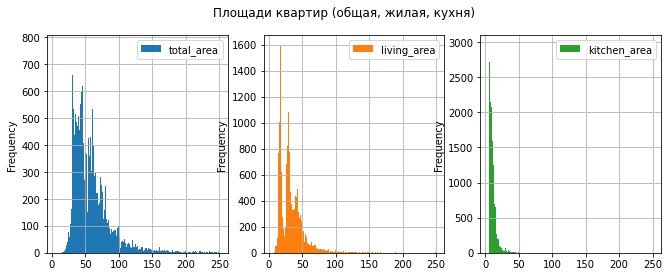

,mean,median,mode
total_area,60.00,52.00,45.00
living_area,34.00,30.00,18.00
kitchen_area,11.00,9.00,6.00


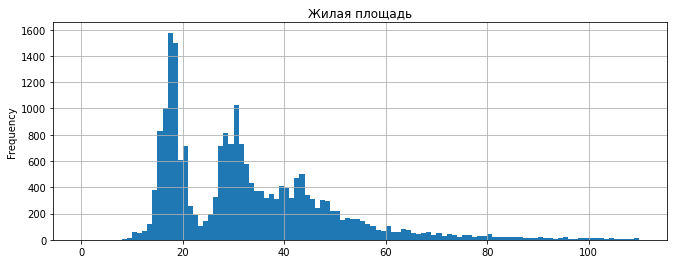

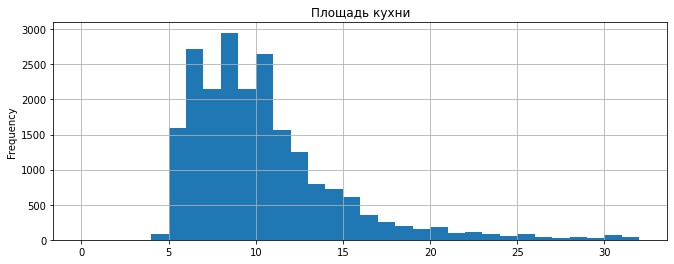

In [31]:
data[['total_area', 'living_area', 'kitchen_area']].plot(kind='hist', title='Площади квартир (общая, жилая, кухня)', grid=True,
                                                         subplots=True, layout=(1, 3), range=(5, 250), bins=250, figsize=(11, 4))
plt.show()
mmm(['total_area', 'living_area', 'kitchen_area'])
data['living_area'].plot(kind='hist', title='Жилая площадь', range=(0, 110), bins=110, figsize=(11, 4), grid=True)
plt.show()
data['kitchen_area'].plot(kind='hist', title='Площадь кухни', range=(0, 32), bins=32, figsize=(11, 4), grid=True)
plt.show()

Все три гистограммы плащадей (общая, жилая, кухня) имеют положительную асимметрию (наклон вправо), что обусловлено преобладанием на рынке недвижимости квартир с меньшей площадью до 80 м<sup>2</sup>. На всех графиках (особенно на гистограмме жилой площади) наблюдаются провалы, причиной которых является то, что массовое строительство исторически велось типовым проектам, количество которых не особо большое.  
Среднее значение, медиана и мода для всех плащадей показаны в таблице.

,mean,median,mode
last_price,"6,541,403.00","4,650,000.00","4,500,000.00"


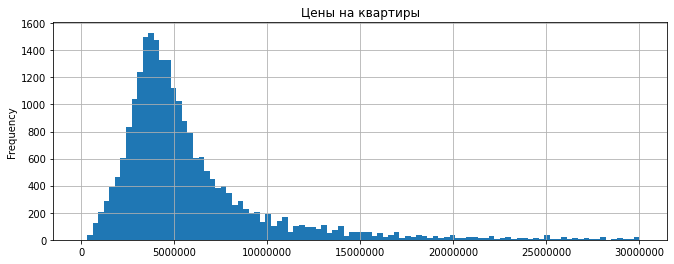

In [32]:
plt.ticklabel_format(style = 'plain')
data['last_price'].plot(kind='hist', title='Цены на квартиры', range=(0, 30000000), bins=100, figsize=(11, 4), grid=True)
mmm(['last_price'])


Цена квартир имеет практически нормальное распределение с небольшим "хвостом" из дорогих квартир вправо. За счет этого "хвоста" происходит увеличение значения средней стоимости квартиры до 6,5 млн. руб. Значения медианы и моды практически совпадают и находятся на уровне 4,5 - 4,6 млн. руб.

,mean,median,mode
rooms,2.00,2.00,1


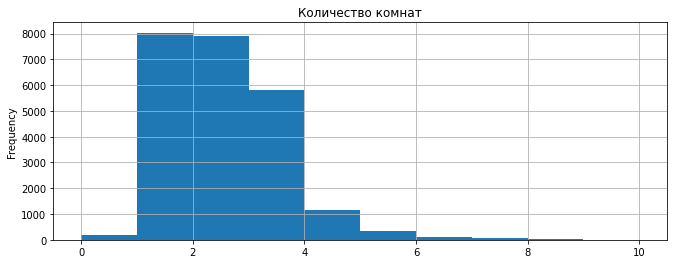

In [33]:
data['rooms'].plot(kind='hist', title='Количество комнат', range=(0, 10), bins=10, figsize=(11, 4), grid=True)
mmm(['rooms'])

Видим, что рынке недвижимости подавляющее большинство в практически равных долях составляют одно и двухкомнатные квартиры. Доля трехкомнтных квартир в полтора раза меньше. Прочие квартиры составляют меньшинство.

,mean,median,mode
ceiling_height,3.00,3.00,2.00


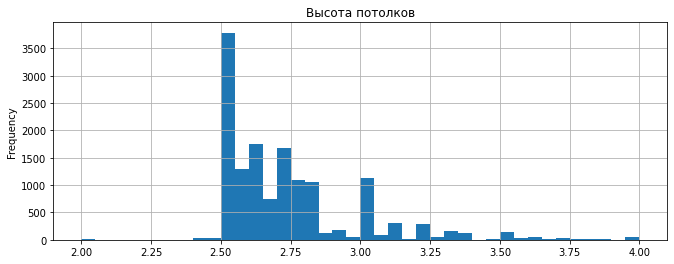

In [34]:
data['ceiling_height'].plot(kind='hist', title='Высота потолков', range=(2, 4), bins=40, figsize=(11, 4), grid=True)
mmm(['ceiling_height'])

Распределение высот потолков резко начинается с 2,5 метров, имеет явно выраженные высоты и впадины и уходит резко ниспадающим "хвостом" вправо после 3 метров. Такой вид графика обусловлен стандартизованной высотой потолков в проектах массовой застройки разных лет. На распределении четко видны основные типовые высоты: 2,5; 2,6; 2,7 и 3 метра. С более чем двукратным перевесом преобладают квартиры с потолками высотой 2,5 метра, как представители наиболее массовых типовых проектов.

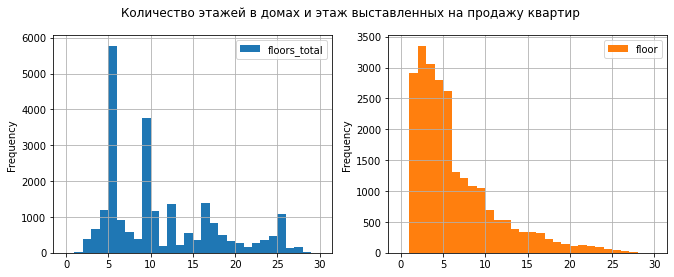

,mean,median,mode
floors_total,11.00,9.00,5
floor,6.00,4.00,2


In [35]:
data[['floors_total', 'floor']].plot(kind='hist', title='Количество этажей в домах и этаж выставленных на продажу квартир', 
                                     grid=True, subplots=True, layout=(1, 2), range=(0, 30), bins=30, figsize=(11, 4))
plt.show()
mmm(['floors_total', 'floor'])

<AxesSubplot:title={'center':'Тип этажа квартиры («первый», «последний», «другой»)'}>

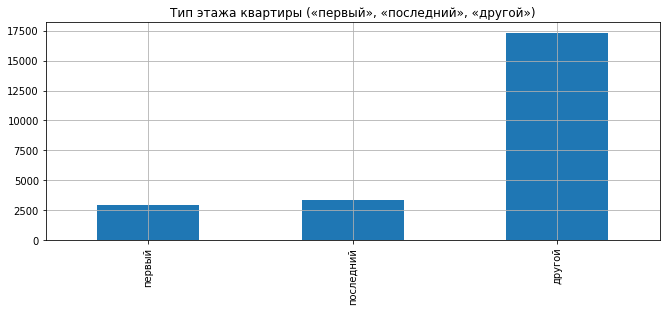

In [36]:
data['type_floor'].value_counts(ascending=True).plot(kind='bar', title='Тип этажа квартиры («первый», «последний», «другой»)', 
                                                     figsize=(11, 4), grid=True)

На графике общего количества этажей в домах снова видим влияние типовых проектов застройки. Основная масса домов - это пяти и девятиэтажки. Из прочих типовых проектов массовой застройки в примерно в равных пропорциях присутствуют 4, 10, 12, 16 и 25 этажные дома.

График распределения этажей не которых расположены квартиры, выставленные на продажу напоминает распределение Пуассона. Мода равна 2, медиана равна 4, а среднее значение - 6. Такие параметры обусловлены преобладаением в регионе домов этажностью до 10 этажей.

Анализ расположения выставленных на продажу квартир на предмет нахождения на первом или последнем этажах показывает, что количество продаваемых квартир на первом и последнем этажах примерно равно с небольшим преимуществом в пользу последнего этажа.

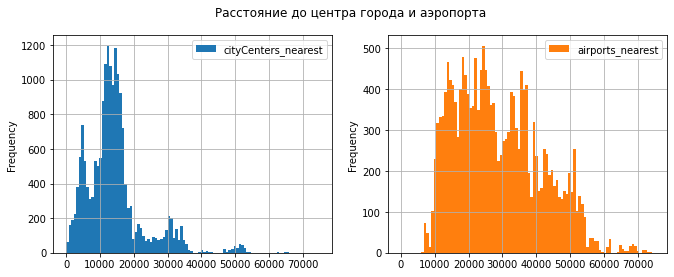

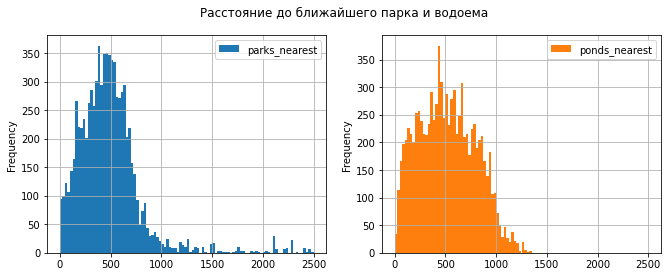

,mean,median,mode
cityCenters_nearest,"14,198.00","13,105.00","8,460.00"
airports_nearest,"28,805.00","26,757.00","37,434.00"
parks_nearest,491.00,454.00,441.00
ponds_nearest,518.00,502.00,427.00


In [37]:
data[['cityCenters_nearest', 'airports_nearest']].plot(kind='hist', title='Расстояние до центра города и аэропорта', 
                                                       grid=True, subplots=True, layout=(1, 2), range=(0, 75000), 
                                                       bins=100, figsize=(11, 4))
plt.show()
data[['parks_nearest', 'ponds_nearest']].plot(kind='hist', title='Расстояние до ближайшего парка и водоема', 
                                              grid=True, subplots=True, layout=(1, 2), range=(0, 2500), 
                                              bins=100, figsize=(11, 4))
plt.show()
mmm(['cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest'])

Анализируя расстояние до центра города, видим два пика. Основной на расстоянии примерно 15 км. и второй, меньший на расстоянии 5 км. Также есть небольшие всплески на расстояниях чуть больше 20 км., чуть больше 30 км. и около 50 км. обусловленные наличием в таблице городов и населенных пунктов Ленинградской области.  
Расстояния до аэропорта начинаются от 7,5 км. Это также прогнозируемо, так как аэропорт находится за городом. Среднее расстояние около 29 км., медиана 26,5 км., а мода 37,5 км. Относительно большие расстояния до аэропорта обусловлены влиянием населенных пунктов Ленинградской области.  
Ближайшие парки и водоемы расположены на удалении в среднем около полукилометра. Основные значения расстояний расположены в диапазоне от 0 (практически рядом) до 800 м. для парков и примерно до 1000 м. для водоемов. В части парков есть небольшой "хвост" значений до 2,5к., можно предположить, что это жильё, расположенное в промышленных районах.

<AxesSubplot:title={'center':'Зависимость от дня недели'}, ylabel='Frequency'>

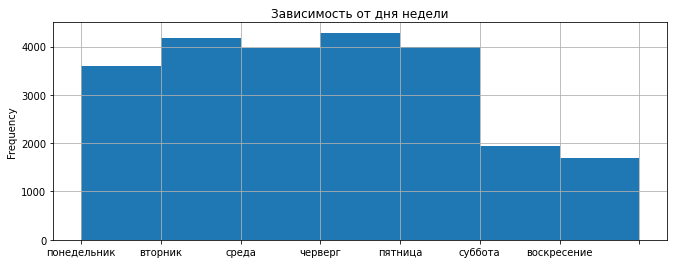

In [38]:
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot()
ax.xaxis.set_major_locator(FixedLocator([0, 1, 2, 3, 4, 5, 6, 7]))
ax.xaxis.set_major_formatter(FixedFormatter(['понедельник', 'вторник', 'среда', 'черверг', 'пятница', 
                                             'суббота', 'воскресение']))
data['weekday'].plot(kind='hist', title='Зависимость от дня недели', range=(0, 7), bins=7, figsize=(11,4), grid=True)

<AxesSubplot:title={'center':'Зависимость от дня месяца'}, ylabel='Frequency'>

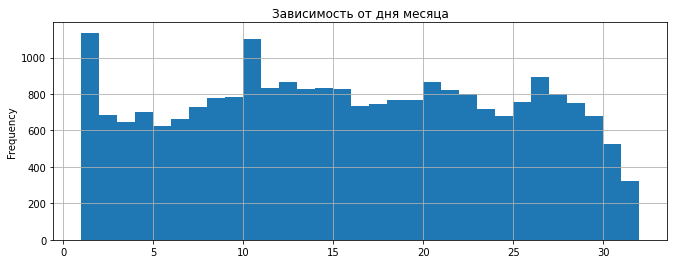

In [39]:
data['day'].plot(kind='hist', title='Зависимость от дня месяца', range=(1, 32), bins=31, figsize=(11,4), grid=True)

<AxesSubplot:title={'center':'Зависимость от месяца'}, ylabel='Frequency'>

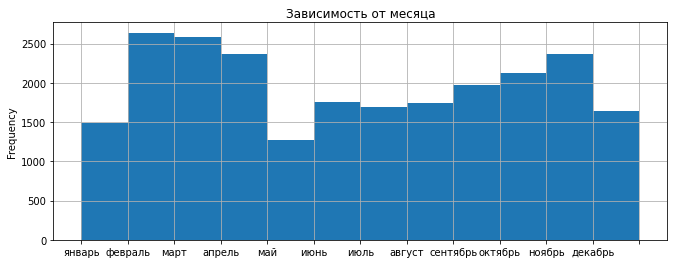

In [40]:
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot()
ax.xaxis.set_major_locator(FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]))
ax.xaxis.set_major_formatter(FixedFormatter(['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август',
                                            'сентябрь', 'октябрь', 'ноябрь', 'декабрь']))
data['month'].plot(kind='hist', title='Зависимость от месяца', range=(1, 13), bins=12, figsize=(11,4), grid=True)

Анализируя статистику подачи объявлений, можно сделать следующие выводы:
- В выходные дни объявлений размещают меньше, чем в будни. Количество объявлений о продаже квартир растет с понедельника по пятницу и резко падает в субботу - воскресение.
- Наибольшее количество объявлений подается в 1-ый и 10-ый день месяца. Не считая этих двух всплесков, в течение месяца объявления поступают равномерно в первую декаду в среднем немного меньше. Также происходит спад количества объявлений в самые последние дни месяца.
- Наибольшее количество объявлений поступает в феврале, марте, апреле и ноябре. Наименьшее - в мае. Спад наблюдается в середине года (май - август) и в декабре - январе.

### 3.2. <a id='toc3_2_'></a>[Анализ сроков продажи квартир](#toc0_)

count              20,470.00
mean                  181.00
std                   220.00
min                     1.00
25%                    45.00
50%                    95.00
75%                   231.00
max                 1,580.00
Name: days_exposition, dtype: float64

Верхняя граница статистически значимой выборки ( Q3 + 1,5 * IQR ): 510.0


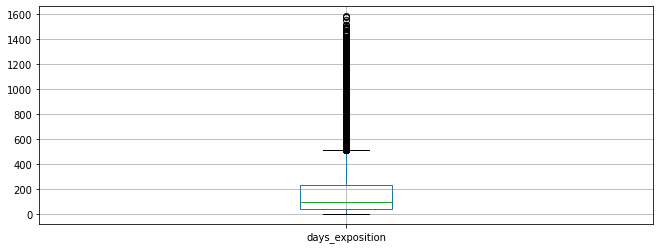

,mean,median,mode
days_exposition,181.00,95.00,45.00


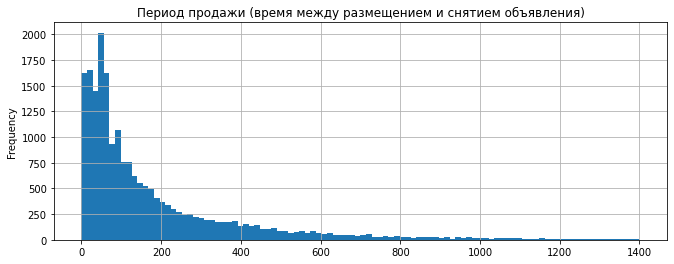

<AxesSubplot:title={'center':'Первые 50% продаж (первые 95 дней)'}, ylabel='Frequency'>

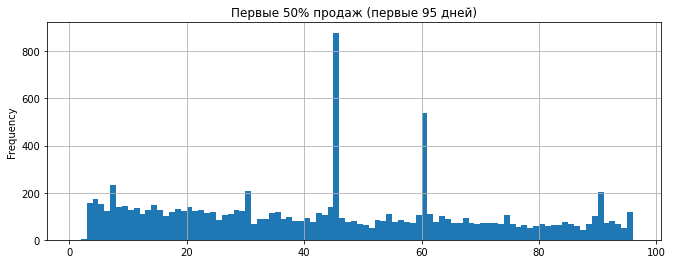

In [41]:
print(data['days_exposition'].describe().round())
print()
print('Верхняя граница статистически значимой выборки ( Q3 + 1,5 * IQR ):', 231 + 1.5 * (231 - 45))

data.boxplot(column='days_exposition', grid=True, figsize=(11, 4))
plt.show()

data['days_exposition'].plot(kind='hist', title='Период продажи (время между размещением и снятием объявления)', 
                             range=(0, 1400), bins=100, figsize=(11, 4), grid=True)

mmm(['days_exposition'])
plt.show()
data['days_exposition'].plot(kind='hist', title='Первые 50% продаж (первые 95 дней)', 
                             range=(1, 96), bins=95, figsize=(11, 4), grid=True)

В соответствии с диаграммой размаха, расчетом квартилей и гистограммой распределения наблюдаем следующие закономерности:
- 25% продаж осуществляется в течении первых 45 дней;
- 50% продаж осуществляется в течении первых 95 дней;
- 75% продаж осуществляется в течении 231 дня;
- значения статистически значимой выборки находится в диапазоне от 0 до 510 дней, свыше 510 дней есть незначительные выбросы (вплоть до 1580 дней).

У данной выборки есть несколько ключевых значений:
- 45 дней (Q1) происходит 25% всех продаж и совпадает с модой;
- 95 дней (медиана) происходит 50% всех продаж;
- 181 день - среднее значение;
- 231 день (Q3) происходит 75% всех продаж;
- 510 дней - верхняя граница статистически значащей выборки (Q3 + 1,5 * IQR).

Продажи до 45 дней (Q1) можно считать быстрыми.  
Продажи свыше 231 дня (Q3) можно считать долгими.

Отдельно проанализируем первый 50% период (первые 95 дней). На гистограмме видим очень высокий пик на 45 день, тоже высокий, но ниже по размерам пик на 60 день и небольшие пики на 7, 30 и 90 дни. Эти пики на фоне остального распределения выглядят неестетственно. Предположительно на 7, 30, 45, 60 и 90 дни после подачи объявления, происходит проверка их актуальности и закрытие. Это обстоятельство уменьшает достоверность поля "days_exposition" в качестве источника данных о сроках продажи объектов. 

### 3.3. <a id='toc3_3_'></a>[Исследование влияния различных факторов на стоимость объектов](#toc0_)

count              23,649.00
mean            6,541,403.00
std            10,896,547.00
min               430,000.00
2%              1,300,000.00
25%             3,400,000.00
50%             4,650,000.00
75%             6,799,000.00
98%            25,000,000.00
max           763,000,000.00
Name: last_price, dtype: float64


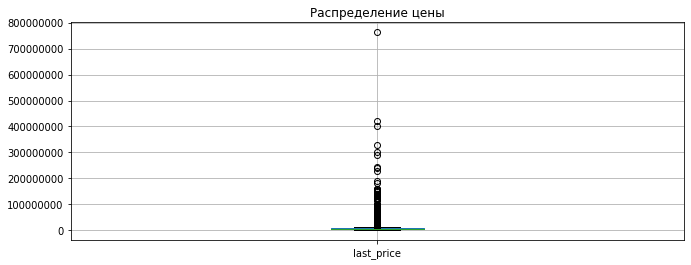

Верхняя граница статистически значимой выборки ( Q3 + 1,5 * IQR ) = 11897500.0
Отбросим выбросы свыше 98 перцентилей (> 25 млн. руб.) и повторно построим диаграмму размаха и гистограмму распределения плотности цены.


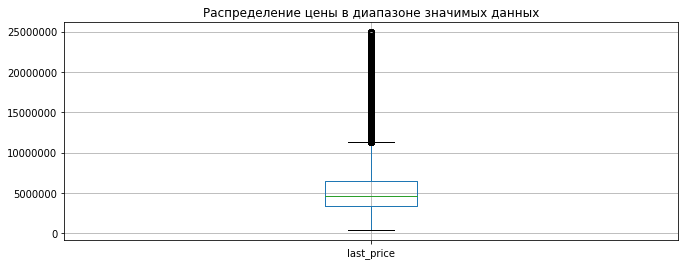

,mean,median,mode
last_price,"6,541,403.00","4,650,000.00","4,500,000.00"


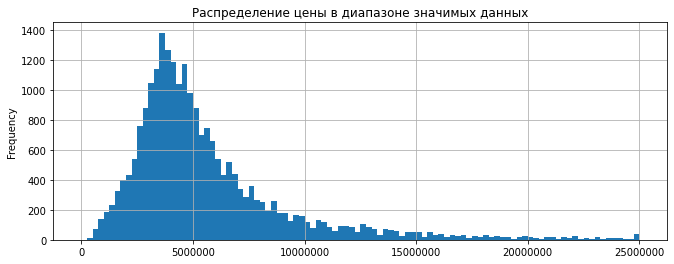

In [42]:
# проанализируем данные о цене квартир
print(data['last_price'].describe(percentiles=[.02, .25, .5, .75, .98]).round())

plt.ticklabel_format(style='plain')
data['last_price'].plot(kind='box', title='Распределение цены', grid=True, figsize=(11, 4))
plt.show()
print('Верхняя граница статистически значимой выборки ( Q3 + 1,5 * IQR ) =', 6799000 + 1.5 * (6799000 - 3400000))
print('Отбросим выбросы свыше 98 перцентилей (> 25 млн. руб.) и повторно построим диаграмму размаха и гистограмму распределения плотности цены.')
plt.ticklabel_format(style='plain')
data.loc[data['last_price'] < 25000000, 'last_price'].plot(kind='box', title='Распределение цены в диапазоне значимых данных', 
                                                           grid=True, figsize=(11, 4))
plt.show()

plt.ticklabel_format(style='plain')
data['last_price'].plot(kind='hist', title='Распределение цены в диапазоне значимых данных', range=(0, 25000000), bins=100, 
                        figsize=(11, 4), grid=True)
mmm(['last_price'])


Распределение цены имеет очень узкий, но длинный "хвост" вправо, в сторону очень дорогих квартир. Медиана значений цены составляет 4,65 млн. руб., среднее значение - 6,54 млн.руб., верхняя граница статистически значимой выборки равна 11,9 млн. руб. Дополнительно расширим верхнюю границу до 98 перцентиля (25 млн. руб.). Выбросы, имеющие более высокие единичные значения, целесообразно отбросить при анализе корреляции исследуемых факторов с ценой.

	 	 Коэффициенты корреляции
вид площади 	 общий 	 в диапазоне от 0 до 98 перцентилей
total_area 	 0.65 	 0.78
living_area 	 0.57 	 0.68
kitchen_area 	 0.52 	 0.59


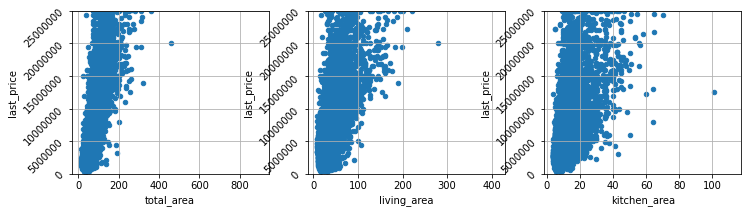

In [43]:
# проверяем зависимость цены 'last_price' от значений столбцов: ['total_area', 'living_area', 'kitchen_area']

# рассчитаем коэффициенты корреляции и построим диаграммы рассеяния для определения зависимости цены от площадей
spisok = ['total_area', 'living_area', 'kitchen_area']
namber = 1
print('\t \t Коэффициенты корреляции')
print('вид площади \t общий \t в диапазоне от 0 до 98 перцентилей')
for stolbec in spisok:
    print(stolbec, '\t', np.round(data[stolbec].corr(data['last_price']), 2), 
          '\t', np.round(data[stolbec].corr(data.loc[data['last_price'] < 25000000, 'last_price']), 2))
    data.plot(x=stolbec, y='last_price', kind='scatter', figsize=(12, 3), ylim=(0, 25000000), 
              grid=True, ax=plt.subplot(1, 3, namber))
    plt.ticklabel_format(style='plain')
    plt.yticks(rotation=45)
    namber += 1

Цена имеет корреляцию с площадью квартиры. Наибольшую корреляцию с ценой имеет общая площадь. Более низкую корреляцию с ценой имеет жилая площадь. Самую низкую, но, тем не менее, устойчивую корреляцию из площадей, имеет площадь кухни.  
При исключении из выборки выбросов, корреляция проявляется более отчетливо.

Коэффициент корреляции 	 0.36


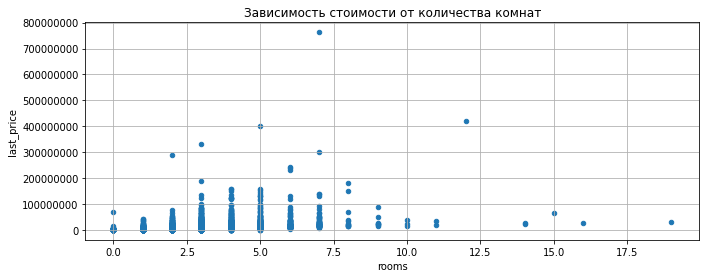

In [44]:
# проверяем зависимость цены 'last_price' от значений столбцов: ['rooms']

print('Коэффициент корреляции \t', np.round(data['rooms'].corr(data['last_price']), 2))

data.plot(x='rooms', y='last_price', kind='scatter', title='Зависимость стоимости от количества комнат', 
          figsize=(11, 4), grid=True)
plt.ticklabel_format(style='plain')
plt.show()


Коэффициент корреляции небольшой - 0,36, но диаграмма рассеяния показывает, что зависимости есть. Снижает коэффициент корреляции разнонаправленная зависимость. Сначала с увеличением количества комнат она растет, затем даже падает.

Посмотрим на эту же зависимость через диаграммы размаха для каждого количества комнат, угруппированные на одном графике.

Text(0.5, 1.0, 'Зависимость стоимости от количества комнат')

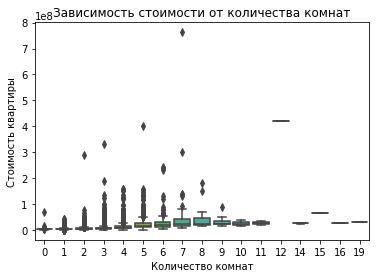

In [45]:
sns.boxplot(x='rooms', y='last_price', data=data)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость стоимости от количества комнат')

Для большей наглядности убираем самые большие одиночные выбросы.

Text(0.5, 1.0, 'Зависимость стоимости от количества комнат')

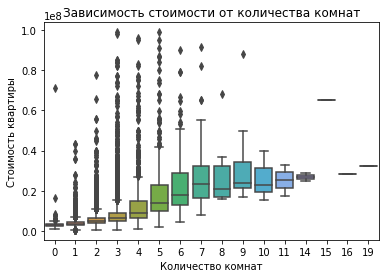

In [46]:
sns.boxplot(x='rooms', y='last_price', data=data.loc[data['last_price'] < 100000000])
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость стоимости от количества комнат')

Видим зависимость стоимости квартиры от количества комнат пока количество комнат растет до 7. В этом же диапазоне комнат наблюдаются наибольшие выбросы - отклонения цены. При дальнейшем увеличении комнат, цена не растет, т.к. цена больше зависит от общей площади квартиры, а не от того на сколько помещений квартира разбита.

Text(0.5, 1.0, 'Зависимость стоимости от этажа')

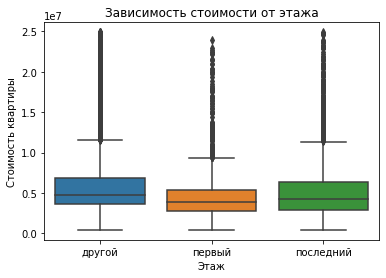

In [47]:
### проверяем зависимость цены 'last_price' от значений столбцов: ['type_floor']
sns.boxplot(x='type_floor', y='last_price', data=data.loc[data['last_price'] < 25000000])
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость стоимости от этажа')

Видим, что квартиры на первых этажах в среднем дешевле. Квартиры на последних этажах также в среднем дешевле, но разброс цен сопоставим с разбросом цен на квартиры на других этажах.

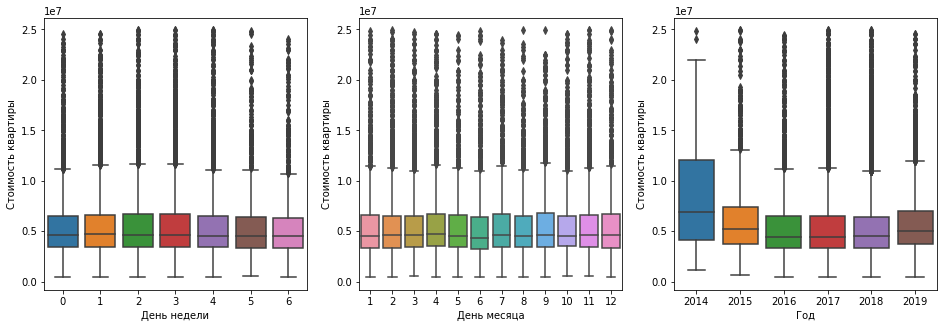

In [48]:
### проверяем зависимость цены 'last_price' от значений столбцов: ['weekday', 'month', 'year']
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.boxplot(x='weekday', y='last_price', data=data.loc[data['last_price'] < 25000000], ax=axes[0]).set(
    xlabel='День недели', ylabel='Стоимость квартиры')
sns.boxplot(x='month', y='last_price', data=data.loc[data['last_price'] < 25000000], ax=axes[1]).set(
    xlabel='День месяца', ylabel='Стоимость квартиры')
sns.boxplot(x='year', y='last_price', data=data.loc[data['last_price'] < 25000000], ax=axes[2]).set(
    xlabel='Год', ylabel='Стоимость квартиры')
plt.show()

Зависимости стоимости квартиры от дня недели и месяца при подаче объявления не наблюдается.

По графику зависимости стоимости квартиры от года видим, что в 2015г. произошло значительное снижение цен на квартиры, в 2016 - 2018 годах цены оставались стабильными, в 2019г. произошел небольшой рост цен.  
Зная, что стоимость квартиры зависит от её площади, посмотрим зависимость от года общей площади продаваемых квартир и стоимости квадратного метра.

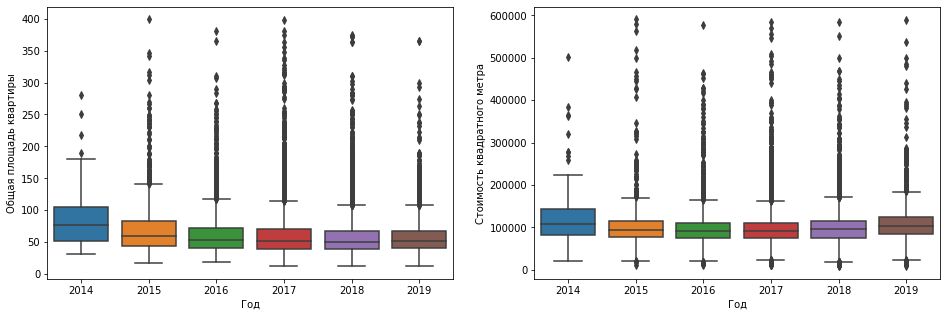

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='year', y='total_area', data=data.loc[data['total_area'] < 400], ax=axes[0]).set(
    xlabel='Год', ylabel='Общая площадь квартиры')
sns.boxplot(x='year', y='one_metre_price', data=data.loc[data['one_metre_price'] < 600000], ax=axes[1]).set(
    xlabel='Год', ylabel='Стоимость квадратного метра')
plt.show()

Сопоставляя графики видим, что:
- снижение цен на квартиры в 2015г. вызвано уменьшением общей площади продаваемых квартир (в большей степени) и уменьшением стоимости квадратного метра жилья (в меньшей степени);
- в 2016г. площадь продаваемых квартир ещё немного снизилась, что нашло отражение в виде небольшого снижения на графике стоимости квартир в 2016г.;
- в 2016 - 2019гг. средняя площадь продаваемых квартир не изменялась;
- стоимость же квадратного метра практически не менялась в 2015 - 2018гг., а в 2019г. произошло увеличение стоимости квадратного метра, которое отразилось увеличением на графике стоимости квартир.

### 3.4. <a id='toc3_4_'></a>[Исследование средней стоимости квадратного метра в населенных пунктах](#toc0_)

In [50]:
print('Средняя стоимость квадратного метра жилья в населенных пунктах \n(показаны первые десять по количеству объявлений).')
display(data.pivot_table(index='locality_name', values='one_metre_price', aggfunc=('count', 'mean','median'))
        .sort_values(by='count', ascending=False).head(10))

print('Отсортировано по уменьшению стоимости квадратного метра \n(те же десять населенных пунктов):')
display(data.pivot_table(index='locality_name', values='one_metre_price', aggfunc=('count', 'mean'))
        .sort_values(by='count', ascending=False).head(10).sort_values(by='mean', ascending=False))

print('Отсортировано по уменьшению стоимости квадратного метра \n (по всей базе):')
display(data.pivot_table(index='locality_name', values='one_metre_price', aggfunc=('count', 'mean'))
        .sort_values(by='mean', ascending=False).head(10))

Средняя стоимость квадратного метра жилья в населенных пунктах 
(показаны первые десять по количеству объявлений).


,count,mean,median
locality_name,,,
Санкт-Петербург,15720,"114,856.31","104,766.09"
посeлок Мурино,522,"85,752.19","85,878.46"
Кудрово,472,"95,324.93","95,675.47"
посeлок Шушары,440,"78,677.36","76,876.17"
Всеволожск,398,"68,654.47","65,789.47"
Пушкин,369,"103,125.82","100,000.00"
Колпино,338,"75,424.58","74,723.75"
посeлок Парголово,327,"90,175.91","91,642.86"
Гатчина,307,"68,746.15","67,796.61"


Отсортировано по уменьшению стоимости квадратного метра 
(те же десять населенных пунктов):


,count,mean
locality_name,,
Санкт-Петербург,15720,"114,856.31"
Пушкин,369,"103,125.82"
Кудрово,472,"95,324.93"
посeлок Парголово,327,"90,175.91"
посeлок Мурино,522,"85,752.19"
посeлок Шушары,440,"78,677.36"
Колпино,338,"75,424.58"
Гатчина,307,"68,746.15"
Всеволожск,398,"68,654.47"


Отсортировано по уменьшению стоимости квадратного метра 
 (по всей базе):


,count,mean
locality_name,,
посeлок Лисий Нос,2,"121,616.22"
Зеленогорск,24,"115,122.80"
Санкт-Петербург,15720,"114,856.31"
посeлок Репино,4,"104,238.61"
Пушкин,369,"103,125.82"
Сестрорецк,183,"101,757.62"
деревня Мистолово,11,"98,549.98"
посeлок Левашово,1,"96,997.69"
Кудрово,472,"95,324.93"


Санкт-Петербург - ожидаемый лидер по количеству объявлений. За ним идут города Ленинградской области. Выборг замыкает десятку городов с самым большим количеством объявлений.  
Среди этих 10 городов самый дорогой квадратный метр жилья в Санкт-Петербурге, самый дешевый - в Выборге.  
Если посмотреть стоимость квадратного метра жилья, то на первые места в ТОП-10, опережая Санкт-Петербург, попадают поселок Лисий Нос и Зеленогорск. Также видны ещё несколько поселков. Количество объявлений в них небольшое, это или элитное жильё, или просто нерепрезентативная выборка.

### 3.5. <a id='toc3_5_'></a>[Исследование влияния на стоимость расстояния от центра города](#toc0_)

Среднее, медиана и мода для расстояния до центра и стоимости километра:


,mean,median,mode
cityCenters_nearest,"11,601.00","12,244.00","8,460.00"
cena_km,"1,520.00",449.00,306.00


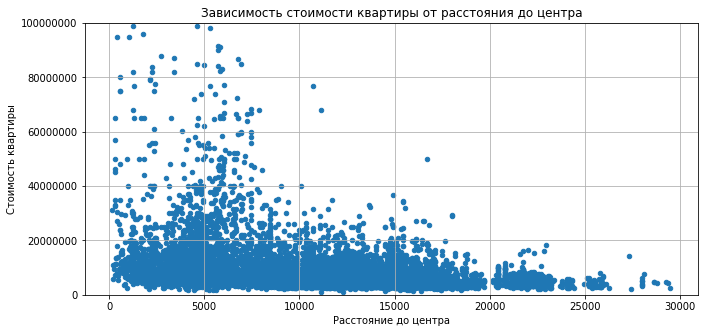

Text(0, 0.5, 'Стоимость километра')

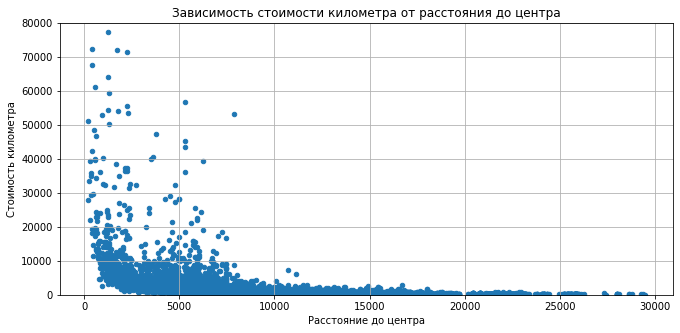

In [51]:
# отложим в отдельный датасет расстояние до центра, стоимость квартиры и стоимость километра по Санкт-Петербургу
cena_kms = data.query('locality_name == "Санкт-Петербург" & ~(cityCenters_nearest.isna())'
                     )[['cityCenters_nearest', 'last_price']]
cena_kms['cena_km'] = cena_kms['last_price'] / cena_kms['cityCenters_nearest']

print('Среднее, медиана и мода для расстояния до центра и стоимости километра:')
mmm2(cena_kms, ['cityCenters_nearest', 'cena_km'])

cena_kms.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(11, 5), grid=True, ylim=(0, 100000000))
plt.title('Зависимость стоимости квартиры от расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Стоимость квартиры')
plt.ticklabel_format(style='plain')
plt.show()

cena_kms.plot(x='cityCenters_nearest', y='cena_km', kind='scatter', figsize=(11, 5), grid=True, ylim=(0, 80000))
plt.title('Зависимость стоимости километра от расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Стоимость километра')

Стоимость объектов ожидаемо уменьшается по мере удаления от центра. Аналогично уменьшается стоимость километра при удалении от центра.

### 3.6. <a id='toc3_6_'></a>[Вывод по разделу 3](#toc0_)

Рассмотрев характеристики объектов (квартир) можно сделать следующие выводы:
- На рынке недвижимости преобладают квартиры с площадью до 80 м<sup>2</sup>. Гистограммы распределения общей, жилой и площади кухни имеют неравномерности, так как большинство домов строилось по типовым проектам массовой застройки с четко определенными площадями. Это дает пики на графиках.
- Большинство квартир одно и двухкомнатные, доля трехкомнатных квартир примерно в 1,5 раза меньше, остальные квартиры составляют меньшинство.
- Основная высота потолков в квартирах составляет 2,5 м. Пики на графиках распределения соответствуют высотам потолков типовых проектов: 2,6; 2,7 и 3 метра.
- Основной тип домов - пяти и девятиэтажные. Из прочих типовых проектов массовой застройки в примерно в равных пропорциях присутствуют 4, 10, 12, 16 и 25 этажные дома. Доля продаваемых квартир на крайних этажах примерно одинаковая, чуть больше продают квартир на последнем этаже, чем на первом.
- Среднее расстояние до центра города составляет 14 км., но на графике распределения есть пики. Основной на расстоянии примерно 15 км., другой (меньший) на расстоянии 5 км. Также есть всплески на расстояниях в районе  20 км., 30 км. и 50 км., которые дают жилые окраины Санкт-Петербурга и населенные пункты Ленинградской области.
- График цен на квартиры имеет близкое к нормальному распределение, без пиков, но картину искажает небольшое количество очень больших по значению выбросов цены на дорогое и элитное жильё. Медиана составляет 4,6 млн. руб. Средняя стоимость 6,5 млн. руб.
- Цена имеет зависимость от:
    - общей площади(в большей степени), жилой площади и площади кухни (в меньшей степени);
    - количества комнат в квартире (актуально только для квартир с количеством комнат от 1 до 7);
    - от расстояния до центра города.  

- Цена практически не зависит от этажа (немного дешевле первые этажи). Зависимости стоимости квартиры от дня недели и месяца подачи объявления нет.  
- В 2015г. произошло снижение цен на квартиры вызванное уменьшением общей площади продаваемых квартир (в большей степени) и снижением стоимости квадратного метра (в меньшей степени) В 2016г. небольшое снижение цены обусловлено дальнейшим снижением площади продаваемых квартир. 2017 - 2018 годах цены на квартиры оставались стабильными. В 2019г. произошел небольшой рост цен, обусловленный ростом стоимости квадратного метра жилья.

Статистика подачи объявлений говорит о том, что в выходные дни объявлений размещают меньше, чем в будни. Наибольшее количество объявлений подается в 1-ый и 10-ый день месяца. Наибольшее количество объявлений поступает в феврале, марте, апреле и ноябре. Наименьшее в мае.  
Средний срок продажи квартир составляет 181 день, но основная часть продается гораздо раньше. Медиана составляет 95 дней, мода 45 дней. На графике распределения есть ярко выраженные пики, предположительно обусловленные методикой работы с базой, что требует отдельного исследования.  
Санкт-Петербург - лидер по количеству объявлений о продаже квартир. Выборг замыкает десятку городов с самым большим количеством объявлений о продаже. Среди этих 10 городов самый дорогой квадратный метр жилья в Санкт-Петербурге, самый дешевый в Выборге. ТОП-3 самых дорогих квадратных метров жилья: поселок Лисий Нос, Зеленогорск и Санкт-Петербург.

## 4. <a id='toc4_'></a>[Общий вывод](#toc0_)

Для исследования была использована база объявлений о продаже квартир общим объемом более 23 тысяч строк (данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах). О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические.  
База содержала пропуски и некорректные значения, поэтому на этапе предобработки данных были выполнены следующие процедуры:
- изучение и заполнение пропусков;
- исследование и корректировка аномальных значений и типов данных;
- проверка на наличие дубликатов;
- добавлены вспомогательные столбцы, необходимые для дальнейшего анализа.

По результатам исследования выявлены следующие особенности и закономерности:
- На рынке недвижимости Санкт-Петербурга и Ленинградской области преобладают одно и двухкомнатные квартиры. Доля трехкомнатных квартир в 1,5 раза меньше доли двухкомнатных квартир, остальные квартиры составляют меньшинство.
- Сильное влияние на параметры объектов оказало массовое строительство по типовым проектам, являющееся преобладающим типом строительства. В частности:
    - Основной тип домов пятиэтажные. Следующими по количеству идут девятиэтажные дома. Существенно меньшее количество и в примерно в равных пропорциях составляют 4, 10, 12, 16 и 25 этажные дома из прочих типовых проектов массовой застройки.
    - Преобладают квартиры с площадью до 80 м<sup>2</sup>. Диаграммы распределения общей, жилой и площади кухни имеют неравномерности с пиками на площадях, соответствующих типовым проектам.
    - Основная высота потолков составляет 2,5 м. Пики на графиках распределения соответствуют высотам потолков типовых проектов: 2,6; 2,7 и 3 метра.
- Среднее расстояние до центра города составляет 14 км., при этом график распределения расстояния до центра неоднороден. Основной пик на расстоянии примерно 15 км. практически совпадает со средним расстоянием. Второй (меньший) пик на расстоянии 5 км. Есть пики на расстояниях 20 км., 30 км. и 50 км., которые дают жилые окраины Санкт-Петербурга и населенные пункты Ленинградской области.
- Доля продаваемых квартир на крайних этажах примерно одинаковая, на последнем этаже квартиры продают чуть чаще, чем на первом.
- Статистика подачи объявлений дает следующие выводы:
    - в выходные дни объявлений размещают меньше, чем в будни;
    - наибольшее количество объявлений подается в 1-ый и 10-ый день месяца;
    - наибольшее количество объявлений поступает в феврале, марте, апреле и ноябре; наименьшее в мае;  
    - средний срок продажи квартир составляет 181 день, при этом медиана составляет 95 дней, мода 45 дней; 
    - самое большое количество объявлений о продаже квартир подают в Санкт-Петербурге.
- График цен на квартиры имеет ровное распределение без пиков и наклон вправо из-за относительно небольшого количества больших по значению выбросов цены на дорогое и элитное жильё. Средняя стоимость объекта составляет 6,5 млн. руб., медиана - 4,6 млн. руб.
- Цена практически не зависит от этажа, а также от дня недели и месяца подачи объявления и зависит от:
    - общей площади(в большей степени), жилой площади и площади кухни (в меньшей степени);
    - количества комнат в квартире (для квартир с количеством комнат от 1 до 7);
    - от расстояния до центра города.  
- Среди ТОП-10 городов с наибольшим количеством объявлений самый дорогой квадратный метр жилья в Санкт-Петербурге, самый дешевый в Выборге. ТОП-3 населенных пунктов с самым дорогим квадратным метром жилья: поселок Лисий Нос, Зеленогорск и Санкт-Петербург.  
- В 2015г. произошло снижение цен на квартиры вызванное уменьшением общей площади продаваемых квартир (в большей степени) и снижением стоимости квадратного метра (в меньшей степени) В 2016г. небольшое снижение цены обусловлено дальнейшим снижением площади продаваемых квартир. 2017 - 2018 годах цены на квартиры оставались стабильными. В 2019г. произошел небольшой рост цен, обусловленный ростом стоимости квадратного метра жилья.

**Следует обратить внимание:**  
На графике распределения сроков продажи квартир, данные для которого берутся из столбца количества дней размещения объявления от публикации до снятия, есть ярко выраженные аномальные пики на 7, 30, 45, 60 и 90 днях с момента размещения объявлений. Предположительно это обусловлено методикой работы с базой недвижимости. Данный факт вносит погрешность в сроки продажи квартир и требует отдельного дополнительного исследования. Детальная информация приведена в соответствующем разделе данного отчета.